In [16]:
import pandas as pd
import constants as const


df = pd.read_pickle(const.JOURNALS_DF)
df_topics = pd.read_csv(const.CLEAN_TOPICS_STM, low_memory=False)

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

data = np.array(df_topics.values[:, 1:])

In [18]:
import os
import pickle

X_embedded = pickle.load(open(const.TFIDF_EMBEDDING, "rb"))
y_pred = list(pickle.load(open(const.TFIDF_CLUSTERING, "rb")))

In [19]:
# data[0,0]
topics = np.argmax(data, axis=1)

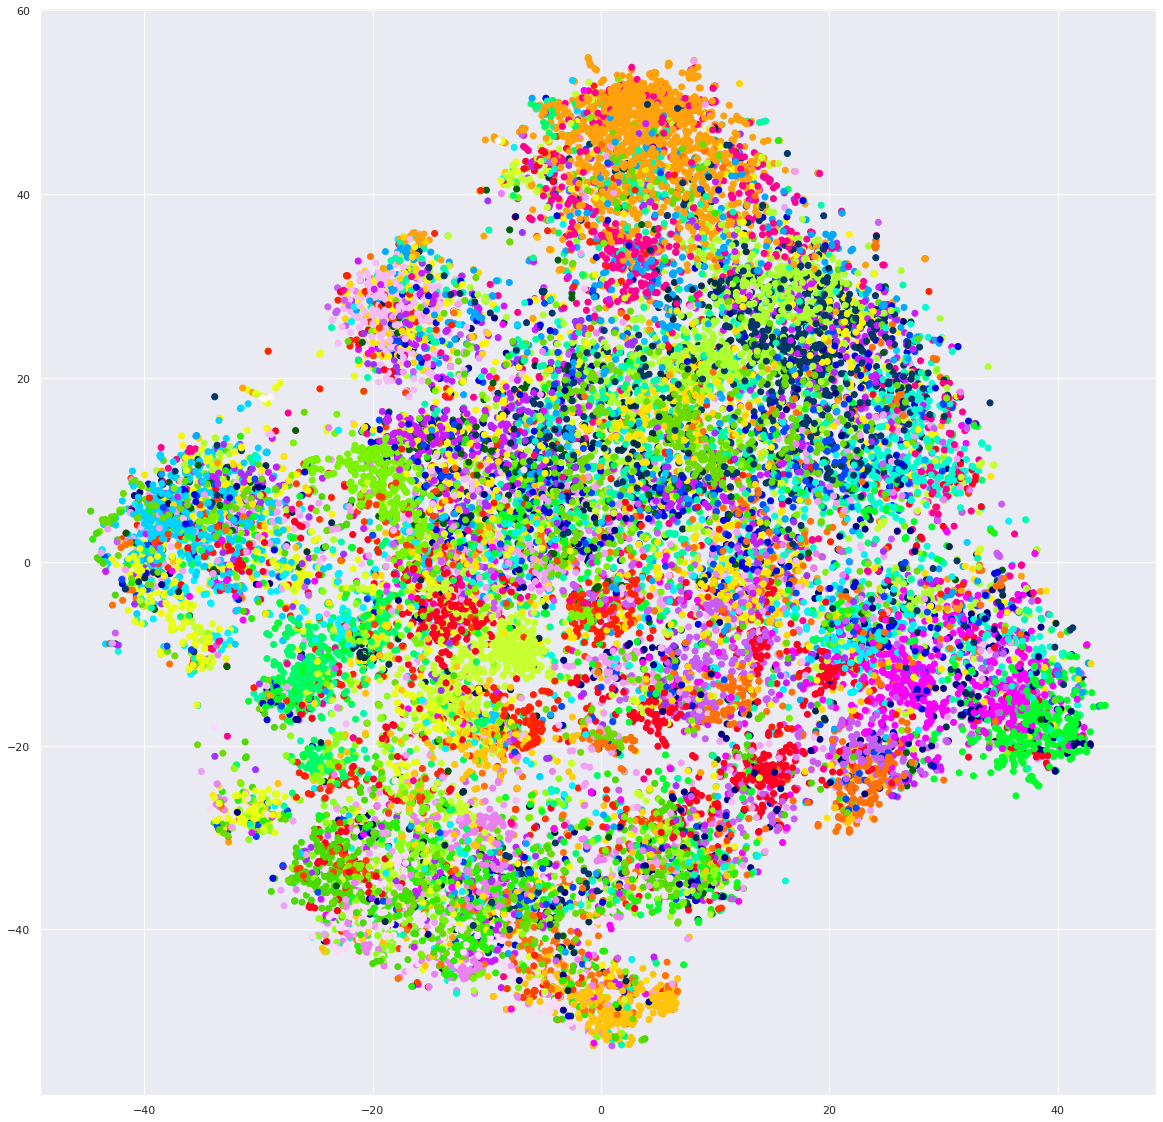

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

plt.figure(figsize=(20,20))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=topics, cmap="gist_ncar")

In [29]:
# extract topics with > 10% probability

relevant_topics = np.argsort(data, axis=1)[:,:10:-1][:,:10]

topics = []
props = []

for n, a in enumerate(relevant_topics):
    doc_topics = list(a)
    doc_topics_probs = list(data[n, a])

    tops = []
    probs = []

    for t, p in zip(doc_topics,doc_topics_probs):
        if p < 0.1 and len(tops) > 0:
            print(len(tops))
            break
        else:
            tops.append(t)
            probs.append(p)


    topics.append(tops)
    props.append(probs)

# data[relevant_topics[:,0]]
# for topics, props in zip(df["lda:topics"], df["lda:topics:props"]):

3
3
3
4
2
2
2
4
4
3
2
3
2
5
3
2
2
3
3
2
2
1
3
3
1
3
3
4
3
3
3
3
1
3
3
2
2
3
3
2
3
2
3
3
1
2
4
3
2
1
3
1
3
3
1
2
3
2
3
2
2
1
2
4
2
3
3
2
3
3
3
2
3
3
3
3
1
3
3
3
2
1
3
3
3
1
3
3
3
2
2
1
3
2
3
3
3
4
2
1
1
3
2
3
3
1
2
2
3
2
4
2
1
3
1
3
2
4
3
3
2
2
2
2
2
4
2
3
3
2
1
3
3
2
2
3
1
3
2
3
4
3
2
2
3
2
4
4
4
1
2
3
4
3
4
3
2
3
3
2
3
3
2
1
2
4
3
2
4
1
2
2
2
4
3
2
3
2
3
4
3
2
3
4
4
1
3
1
2
2
3
3
3
2
2
2
1
2
2
4
4
2
2
3
3
3
2
3
2
2
3
3
2
3
1
2
3
4
3
2
3
3
2
2
3
2
2
2
3
2
2
2
3
3
2
2
3
3
2
2
3
2
2
3
2
3
2
4
2
2
3
4
3
2
1
1
4
2
1
4
1
3
2
4
2
2
3
3
3
2
2
4
3
1
3
3
3
3
3
1
1
4
2
4
2
2
3
3
4
2
3
3
3
3
4
4
2
2
3
1
2
3
2
2
2
1
3
3
2
3
3
4
3
2
3
1
2
3
1
4
2
3
1
2
4
1
2
3
2
3
2
3
1
1
3
2
2
2
2
1
3
2
3
3
2
2
2
3
3
4
3
1
2
3
3
2
3
4
2
2
2
2
4
3
3
2
3
3
3
3
4
3
2
3
5
1
4
2
2
2
4
2
2
3
3
2
3
1
3
2
3
2
1
4
1
3
5
2
3
3
3
3
2
4
2
2
2
3
2
3
2
3
2
3
1
3
4
3
3
2
1
1
3
3
3
3
2
3
1
3
2
2
3
2
4
2
2
2
3
3
3
2
3
2
2
3
4
4
3
2
4
3
3
3
3
2
3
3
3
1
2
4
2
2
3
3
3
2
2
2
3
3
4
3
3
1
2
2
4
3
4
1
3
3
2
2
2
4
2
2
4
2
2
1
2
2
2
2
3
2


In [30]:
df = df[~df[const.ABSTRACTS].isna()]

df["stm:topics"] = pd.Series(topics, index=df.index)
df["stm:topics:probs"] = pd.Series(props, index=df.index)

In [31]:
from os.path import join

pd.to_pickle(df, join(const.ARTIFACTS_DIR, "journals-with-stm-topics.pkl"))

In [24]:
pca = PCA(n_components=40)
X_pca = pca.fit_transform(data)

In [25]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)

In [26]:
plt.figure(figsize=(20,20))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=[topic[0] for topic in topics], cmap="gist_ncar")

IndexError: list index out of range

<Figure size 1440x1440 with 0 Axes>

In [ ]:
with open(join(const.BOKEH_DIR, "X-embedding-stm-tfidf.pkl"), "wb") as f:
    pickle.dump(X_tsne, f)